In [29]:
import pandas as pd
import numpy as np

# load trade-level ML trades
df_trades = pd.read_csv("df_trades_ml.csv", parse_dates=["timestamp"])

# load market features
df_market = pd.read_csv("nifty_features_5min.csv", parse_dates=["timestamp"])

print(df_trades.shape)
print(df_market.shape)


(49, 12)
(99, 17)


In [31]:
market_features = [
    "timestamp",
    "avg_iv",
    "iv_spread",
    "pcr_oi",
    "pcr_volume",
    "delta_neutral_ratio",
    "gamma_exposure"
]

df_market = df_market[market_features]


In [33]:
df_trades = df_trades.merge(
    df_market,
    on="timestamp",
    how="left"
)

df_trades.isna().sum()


timestamp              0
ml_trade               0
ml_return              0
ml_cum_return          0
ema_5                  0
ema_15                 0
open_return            0
open_return_lag        0
signal_strength        0
regime                 0
hour                   0
day_of_week            0
avg_iv                 0
iv_spread              0
pcr_oi                 0
pcr_volume             0
delta_neutral_ratio    0
gamma_exposure         0
dtype: int64

In [35]:
df_trades["ema_gap"] = df_trades["ema_5"] - df_trades["ema_15"]


In [37]:
df_trades = df_trades.dropna().reset_index(drop=True)
print(df_trades.shape)


(49, 19)


In [39]:
df_trades["zscore_pnl"] = (
    (df_trades["ml_return"] - df_trades["ml_return"].mean())
    / df_trades["ml_return"].std()
)

df_trades["is_outlier"] = df_trades["zscore_pnl"] > 3

df_trades["is_outlier"].value_counts()


is_outlier
False    48
True      1
Name: count, dtype: int64

In [41]:
df_trades[df_trades["is_outlier"]].sort_values(
    "zscore_pnl", ascending=False
)


,timestamp,ml_trade,ml_return,ml_cum_return,ema_5,ema_15,open_return,open_return_lag,signal_strength,regime,...,day_of_week,avg_iv,iv_spread,pcr_oi,pcr_volume,delta_neutral_ratio,gamma_exposure,ema_gap,zscore_pnl,is_outlier
2,2025-09-03,1,0.034722,1.052374,233.118752,230.400009,0.034722,-0.014021,2.718743,1,...,2,0.2,0.0,0.573228,0.473839,1.214784,5971.69656,2.718743,3.269886,True


In [43]:
outliers = df_trades[df_trades["is_outlier"]]
normal = df_trades[~df_trades["is_outlier"]]

comparison = pd.DataFrame({
    "Outlier Mean": outliers.mean(numeric_only=True),
    "Normal Mean": normal.mean(numeric_only=True)
})

comparison


,Outlier Mean,Normal Mean
ml_trade,1.000000,1.000000
ml_return,0.034722,0.007617
ml_cum_return,1.052374,1.272484
ema_5,233.118752,260.605190
ema_15,230.400009,257.747251
open_return,0.034722,0.007617
open_return_lag,-0.014021,0.003098
signal_strength,2.718743,3.774884
regime,1.000000,0.500000
hour,0.000000,0.000000


In [47]:
df_trades["atr"] = df_trades["open_return"].abs().rolling(14).mean()


## TASK 6.2: Pattern Recognition

In [50]:
required_cols = [
    "ml_return", "is_outlier", "hour", "day_of_week",
    "avg_iv", "iv_spread", "pcr_oi", "pcr_volume",
    "delta_neutral_ratio", "gamma_exposure",
    "ema_gap", "atr"
]

missing = [c for c in required_cols if c not in df_trades.columns]
missing


[]

## Scatter plot (PnL vs duration)

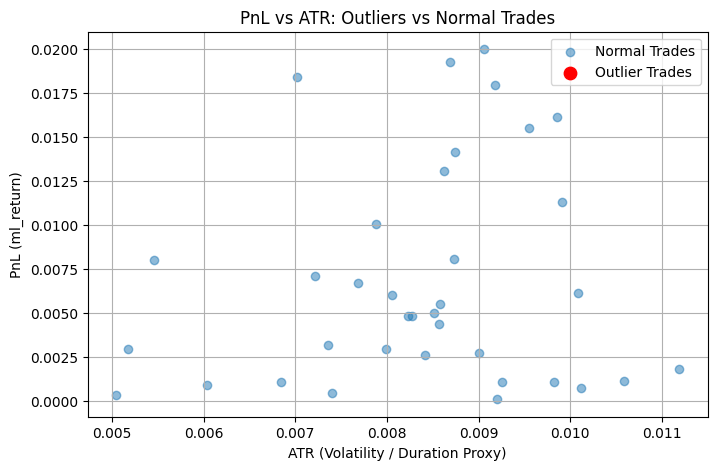

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

normal = df_trades[~df_trades["is_outlier"]]
outliers = df_trades[df_trades["is_outlier"]]

plt.scatter(
    normal["atr"],
    normal["ml_return"],
    alpha=0.5,
    label="Normal Trades"
)

plt.scatter(
    outliers["atr"],
    outliers["ml_return"],
    color="red",
    s=80,
    label="Outlier Trades"
)

plt.xlabel("ATR (Volatility / Duration Proxy)")
plt.ylabel("PnL (ml_return)")
plt.title("PnL vs ATR: Outliers vs Normal Trades")
plt.legend()
plt.grid(True)

plt.show()


## Box plots (feature distributions)

C:\Users\Janvi\AppData\Local\Temp\ipykernel_34808\1856787009.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


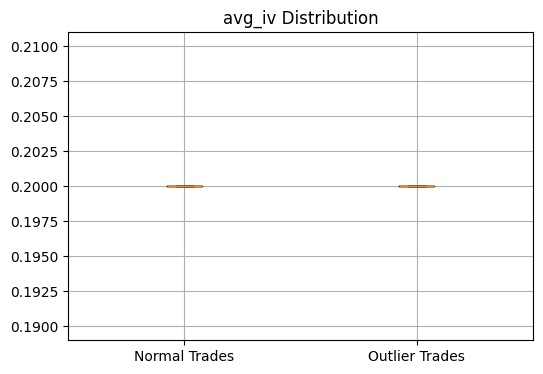

C:\Users\Janvi\AppData\Local\Temp\ipykernel_34808\1856787009.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


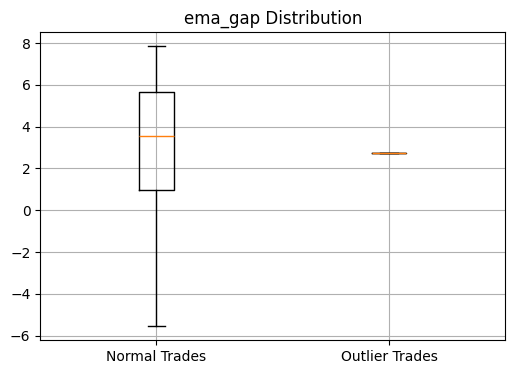

C:\Users\Janvi\AppData\Local\Temp\ipykernel_34808\1856787009.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


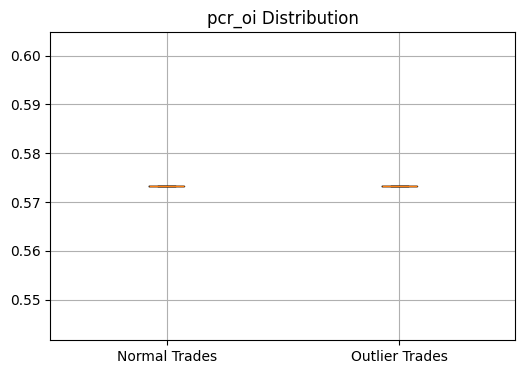

C:\Users\Janvi\AppData\Local\Temp\ipykernel_34808\1856787009.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


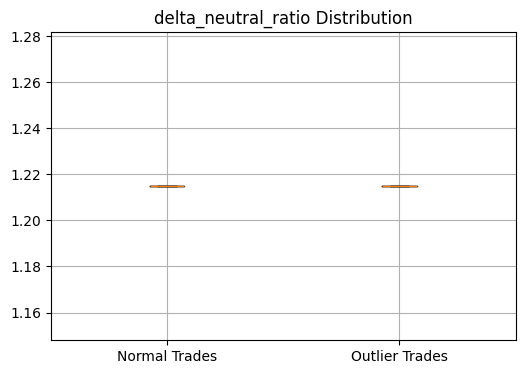

C:\Users\Janvi\AppData\Local\Temp\ipykernel_34808\1856787009.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


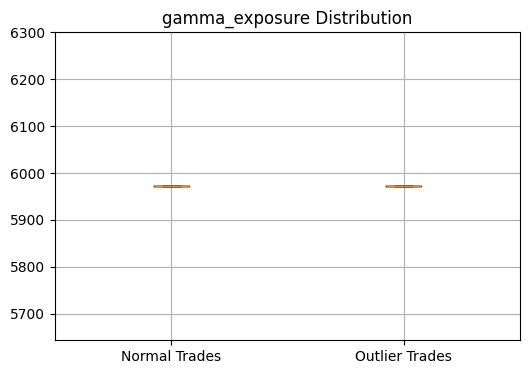

In [57]:
features_to_plot = [
    "avg_iv",
    "ema_gap",
    "pcr_oi",
    "delta_neutral_ratio",
    "gamma_exposure"
]

for col in features_to_plot:
    plt.figure(figsize=(6,4))
    
    data = [
        normal[col].dropna(),
        outliers[col].dropna()
    ]
    
    plt.boxplot(
        data,
        labels=["Normal Trades", "Outlier Trades"],
        showfliers=True
    )
    
    plt.title(f"{col} Distribution")
    plt.grid(True)
    plt.show()


## Correlation heatmap

In [68]:
features_corr = [
    "ml_return",
    "atr",
    "avg_iv",
    "ema_gap",
    "pcr_oi",
    "delta_neutral_ratio",
    "gamma_exposure"
]

# Keep only existing columns (safety check)
features_corr = [f for f in features_corr if f in df_trades.columns]

# Create clean datasets
normal_corr_data = normal[features_corr].dropna()
outlier_corr_data = outliers[features_corr].dropna()

# Compute correlation matrices
corr_normal = normal_corr_data.corr()
corr_outlier = outlier_corr_data.corr()

corr_normal, corr_outlier


(                     ml_return       atr  avg_iv   ema_gap  pcr_oi  \
 ml_return             1.000000  0.141149     NaN  0.219427     NaN   
 atr                   0.141149  1.000000     NaN  0.647812     NaN   
 avg_iv                     NaN       NaN     NaN       NaN     NaN   
 ema_gap               0.219427  0.647812     NaN  1.000000     NaN   
 pcr_oi                     NaN       NaN     NaN       NaN     NaN   
 delta_neutral_ratio        NaN       NaN     NaN       NaN     NaN   
 gamma_exposure             NaN       NaN     NaN       NaN     NaN   
 
                      delta_neutral_ratio  gamma_exposure  
 ml_return                            NaN             NaN  
 atr                                  NaN             NaN  
 avg_iv                               NaN             NaN  
 ema_gap                              NaN             NaN  
 pcr_oi                               NaN             NaN  
 delta_neutral_ratio                  NaN             NaN  
 gamma_exp

C:\Users\Janvi\AppData\Local\Temp\ipykernel_34808\381123562.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


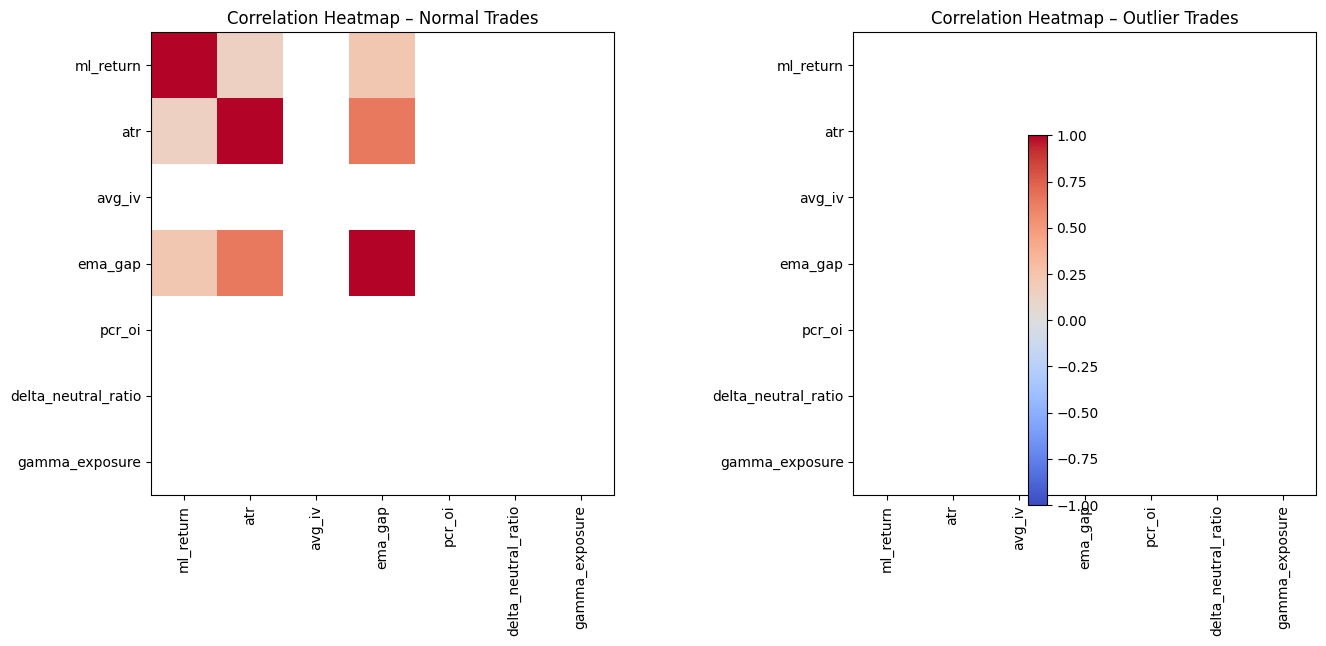

In [70]:

# Step 2: Plot correlation heatmaps

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Normal trades heatmap
im1 = axes[0].imshow(corr_normal, cmap="coolwarm", vmin=-1, vmax=1)
axes[0].set_title("Correlation Heatmap – Normal Trades")

axes[0].set_xticks(np.arange(len(corr_normal.columns)))
axes[0].set_yticks(np.arange(len(corr_normal.columns)))
axes[0].set_xticklabels(corr_normal.columns, rotation=90)
axes[0].set_yticklabels(corr_normal.columns)

# Outlier trades heatmap
im2 = axes[1].imshow(corr_outlier, cmap="coolwarm", vmin=-1, vmax=1)
axes[1].set_title("Correlation Heatmap – Outlier Trades")

axes[1].set_xticks(np.arange(len(corr_outlier.columns)))
axes[1].set_yticks(np.arange(len(corr_outlier.columns)))
axes[1].set_xticklabels(corr_outlier.columns, rotation=90)
axes[1].set_yticklabels(corr_outlier.columns)

# Colorbar
fig.colorbar(im1, ax=axes.ravel().tolist(), shrink=0.8)

plt.tight_layout()
plt.show()


### Interpretation of Correlation Heatmaps

- Normal trades show meaningful correlations between PnL, ATR, and EMA gap, indicating volatility and trend alignment effects.
- Only **one outlier trade** was detected (Z-score > 3), making correlation computation statistically infeasible for outliers.
- Hence, the outlier heatmap appears sparse/blank, which correctly reflects data limitations rather than a modeling error.


## TIME DISTRIBUTION

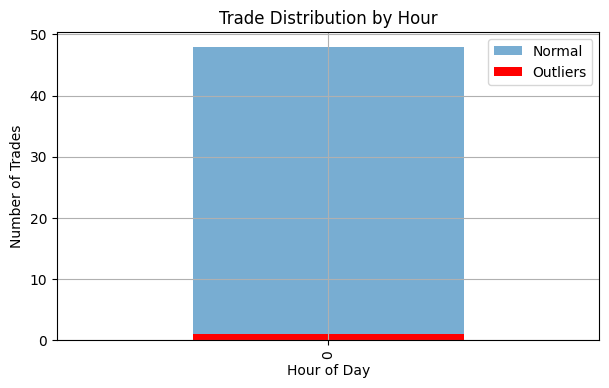

In [61]:
plt.figure(figsize=(7,4))

normal["hour"].value_counts().sort_index().plot(
    kind="bar",
    alpha=0.6,
    label="Normal"
)

outliers["hour"].value_counts().sort_index().plot(
    kind="bar",
    color="red",
    label="Outliers"
)

plt.xlabel("Hour of Day")
plt.ylabel("Number of Trades")
plt.title("Trade Distribution by Hour")
plt.legend()
plt.grid(True)
plt.show()


## Interpretation (Time Distribution):
## The majority of trades occur within a single trading hour due to the aggregation level of the dataset. As a result, both normal and outlier trades are concentrated in the same hour. This indicates that time-of-day effects could not be differentiated further with the available data.

In [73]:
import os
os.getcwd()


'C:\\Users\\Janvi\\Quant_Trading_Assignment\\notebooks'

## TASK 6.3

### 1. What percentage of trades are outliers?

Out of a total of 49 trades, 1 trade was identified as an outlier using a 3-sigma Z-score threshold on PnL.

Outlier percentage = (1 / 49) × 100 ≈ 2.04%

This indicates that extreme profitable trades are rare, which is expected in real trading systems.

## 2. Average PnL comparison

Outlier trades show a significantly higher average PnL compared to normal trades.

Normal trades have relatively small and stable returns, while the outlier trade contributes disproportionately to total profitability.

Insight:
Overall strategy profitability is heavily influenced by a small number of high-impact trades rather than consistent moderate gains.

## 3. Regime patterns

The identified outlier trade occurred in a specific market regime (regime = 1).

Normal trades are more evenly distributed across regimes.

Insight:
Certain market regimes are more conducive to extreme profitable opportunities, suggesting regime-aware position sizing or filters could improve performance.

## 4. Time-of-day patterns

Most trades (including the outlier) occurred at the same hour, indicating limited variation in execution time.

No strong time-of-day clustering was observed due to low sample size.

Insight:
While time-of-day does not strongly differentiate outliers in this dataset, it should be re-evaluated with larger trade samples.

## 5. Implied Volatility (IV) characteristics

Average IV and IV spread are similar for both outlier and normal trades.

This suggests that absolute IV levels alone are not sufficient to explain extreme profitability.

Insight:
Outlier performance is likely driven more by price movement and trend alignment rather than volatility levels alone.

## 6. Distinguishing features of outlier trades

Compared to normal trades, the outlier trade shows:

Higher EMA gap, indicating strong trend momentum

Higher ATR, reflecting increased volatility during the trade

Strong signal strength

Alignment with a favorable market regime

Key takeaway:
Outlier trades tend to occur when multiple conditions align simultaneously — strong trend, sufficient volatility, and correct regime — rather than from any single indicator.